## Day 83 Lecture 2 Assignment

In this assignment, we will learn about other optimization algorithms. We will create a neural network and try out the different optimization algorithms and compare their performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In this assignment, we will be using the cancer data that we have worked with in previous lessons. The pre-processed data is loaded below.

In [2]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/cancer_processed.csv')

In [3]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


In [4]:
cancer.isnull().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
diagnosis                 0
dtype: int64

As you may recall, diagnosis is the target variable. One hot encode the diagnosis column.

In [5]:
#check value counts of target variable
cancer['diagnosis'].value_counts()



B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
cancer2 = pd.get_dummies(cancer,columns=['diagnosis'],drop_first=True)
cancer2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


Split the data into train and test with 20% of the data in test.

In [7]:
# define X and y
X = cancer2.drop('diagnosis_M', axis=1)
y = cancer2['diagnosis_M']

# test/train split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scale all other variables using the standard scaler.

In [8]:
# scale our data using standard scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Generate a sequential model consisting of 5 layers. The layers should be of size 128, 64, 32, 32, 1. Use the appropriate activation for the output layer based on the type of prediction algorithm we are producing.

In [9]:
# build model function

def build_sgd_model(optimizer,model_name='Model',output_activation='sigmoid',metrics='accuracy',loss='binary_crossentropy',
                batch_size=100,epochs=200,learning_rate=.01,momentum=0):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation='relu'))
  # second layer
  model.add(Dense(64 ,activation='relu'))
  # third layer
  model.add(Dense(32 ,activation='relu'))
  # fourth layer
  model.add(Dense(32 ,activation='relu'))
  # fifth layer/output layer with output activation
  model.add(Dense(1 ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate,momentum=momentum)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history


def model_results(model,history,model_name='Model'):
  # dataframe with epoch history
  model_df = pd.DataFrame(history.history)
  # plot model loss over epochs
  model_df[['loss', 'val_loss']].plot(figsize=(20,10))
  plt.title(f'{model_name} Loss'.capitalize() )
  plt.show()
  # plot model accuracy over epochs
  model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
  plt.title(f'{model_name} Accuracy'.capitalize() )
  plt.show()  
  # final epoch model results
  results = model.evaluate(X_test_scaled, y_test, verbose=0)
  print(f'{model_name} Loss: '.capitalize() , round(results[0],6))
  print(f'{model_name} Accuracy: '.capitalize() , round(results[1],6))

Initialize a SGD optimizer with learning rate 0.05 and momentum 0.9. Compile and fit the model using the appropriate loss function and metric and use the optimizers defined above.

batch size = 100, epochs = 200

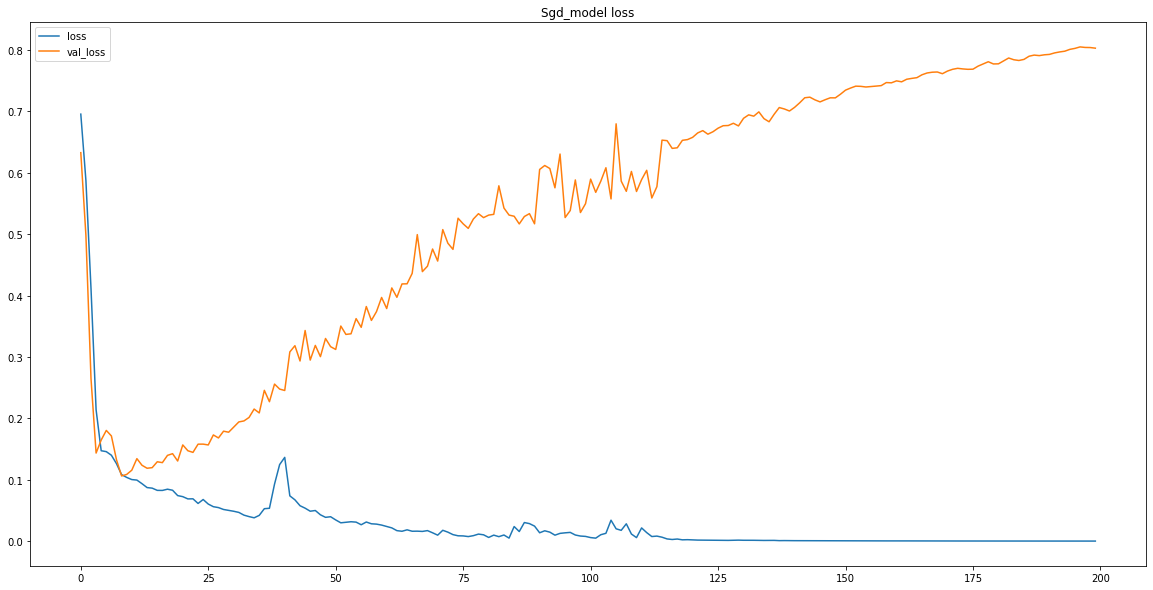

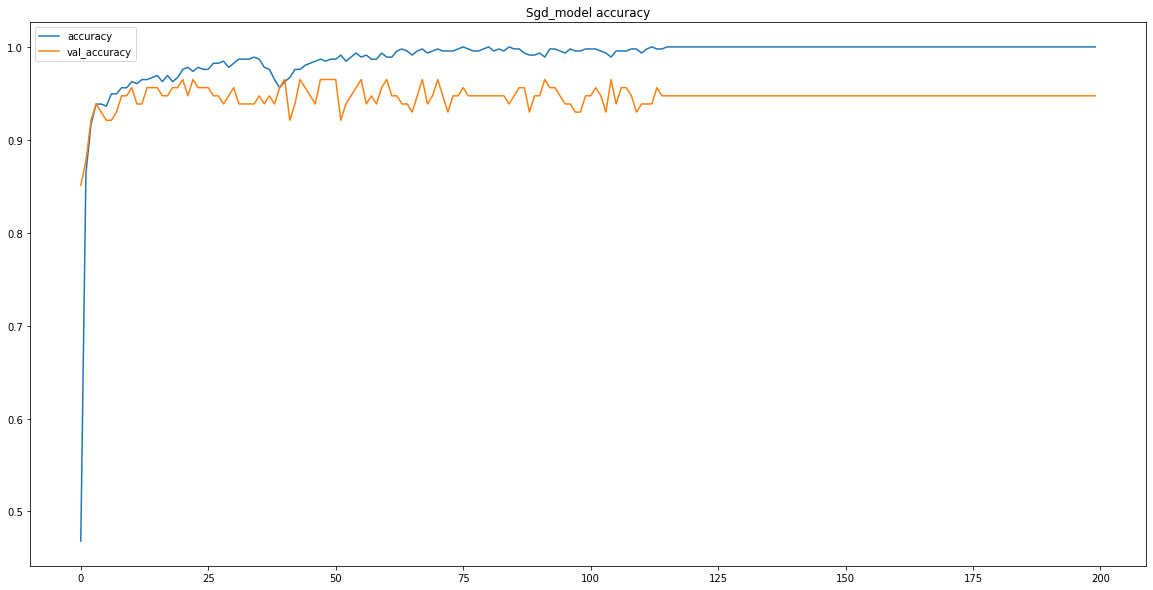

Sgd_model loss:  0.802833
Sgd_model accuracy:  0.947368
--- 14.996405363082886 seconds ---


In [10]:
# time model run time
start_time = time.time() 
# build sgd model
sgd_model, sgd_model_history = build_sgd_model(optimizer=SGD,learning_rate=.05,momentum=.9, batch_size=100, epochs=200)
#model results and visuals
sgd_results = model_results(sgd_model, sgd_model_history, model_name='sgd_model')
# print model runtime
print("--- %s seconds ---" % (time.time() - start_time))

Define the RMSprop optimizer with a learning rate of 0.05. Compile and fit the model using the optimizer defined above. 

In [11]:
# build model function

def build_model(optimizer,model_name='Model',output_activation='sigmoid',metrics='accuracy',loss='binary_crossentropy',
                batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation='relu'))
  # second layer
  model.add(Dense(64 ,activation='relu'))
  # third layer
  model.add(Dense(32 ,activation='relu'))
  # fourth layer
  model.add(Dense(32 ,activation='relu'))
  # fifth layer/output layer with output activation
  model.add(Dense(1 ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history

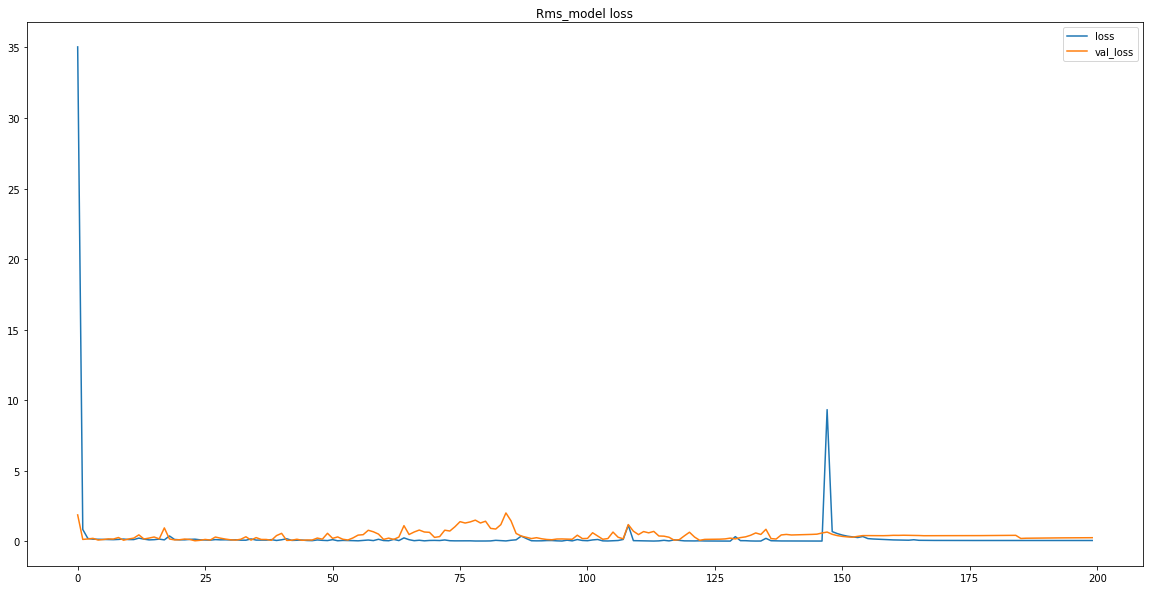

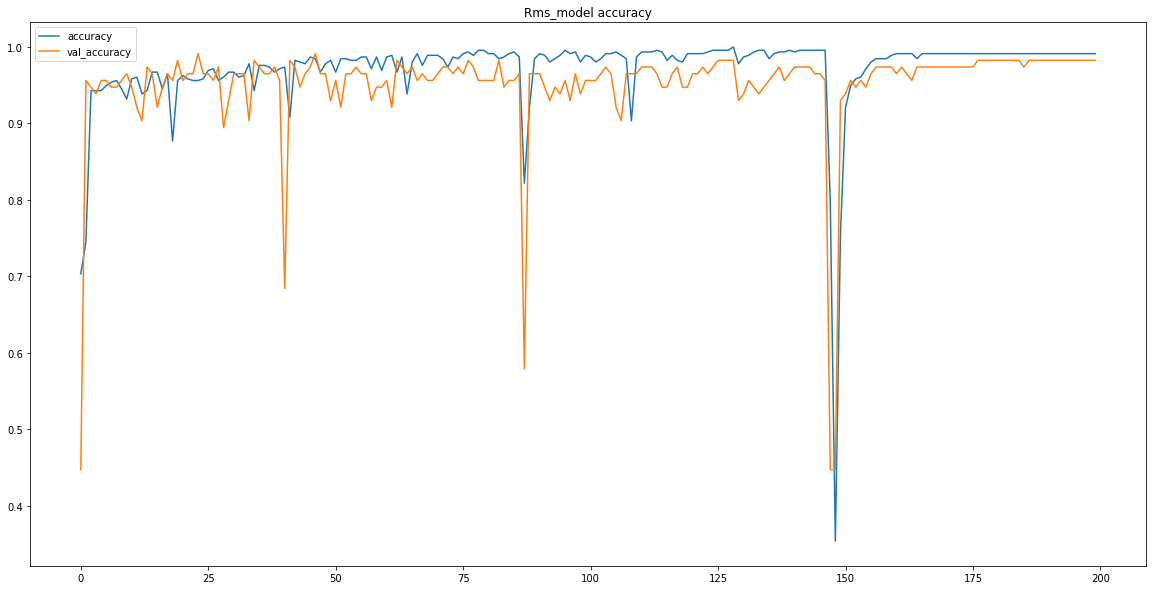

Rms_model loss:  0.245246
Rms_model accuracy:  0.982456
--- 15.391570806503296 seconds ---


In [12]:
# time model run time
start_time = time.time() 
# build RMSprop model
rms_model, rms_model_history = build_model(optimizer=RMSprop,learning_rate=.05, batch_size=100, epochs=200)
#model results and visuals
rms_results = model_results(rms_model, rms_model_history, model_name='rms_model')
# print model runtime
print("--- %s seconds ---" % (time.time() - start_time))

What do you notice about the accuracy?

The RMSprop model is much more accurate than SGD model. Its loss function is also much lower, but run time is longer. 

Define the Adam optimizer with learning rate 0.01. Compile and fit the model using the optimizer defined above.

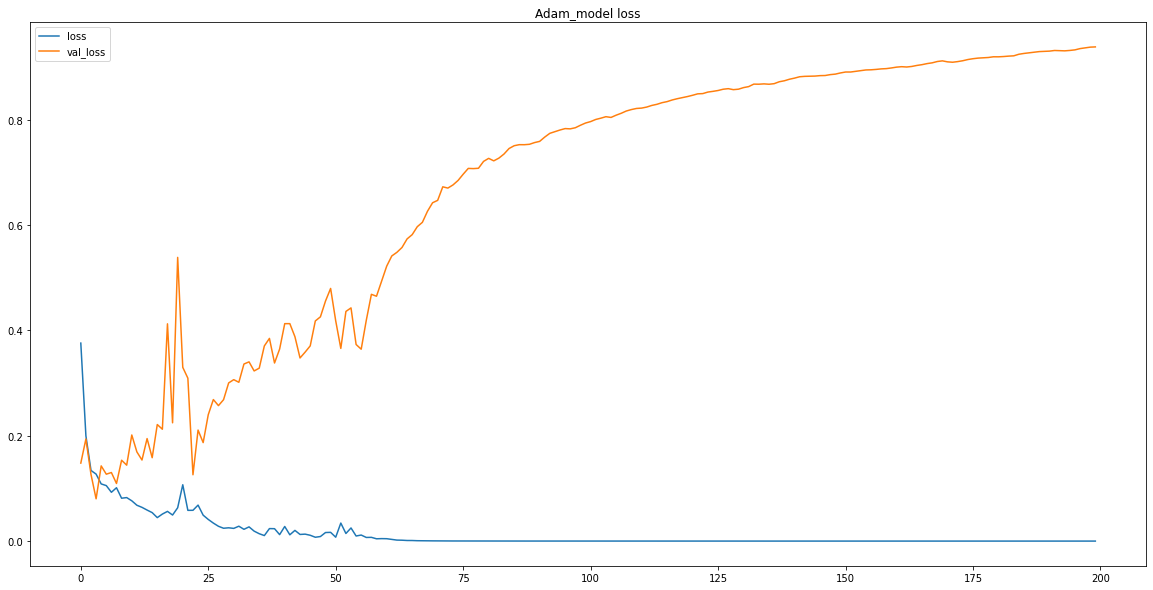

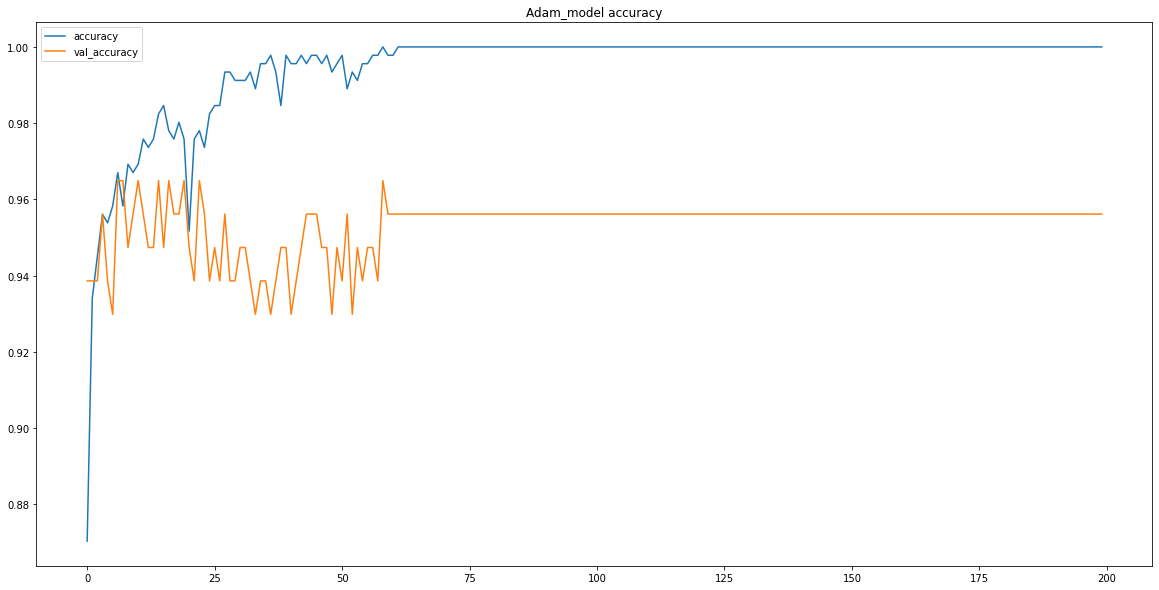

Adam_model loss:  0.938621
Adam_model accuracy:  0.95614
--- 15.706109046936035 seconds ---


In [13]:
# time model run time
start_time = time.time() 
# build Adam model
adam_model, adam_model_history = build_model(optimizer=Adam,learning_rate=.01, batch_size=100, epochs=200)
#model results and visuals
adam_results = model_results(adam_model, adam_model_history, model_name='adam_model')
# print model runtime
print("--- %s seconds ---" % (time.time() - start_time))



How does the peformance differ with this optimizer?

The Adam model with a learning rate of .01 does worse than the RMSprop model, but better than the SGD model. It has the slowest runtime of the 3 models.

Now change the learning rate to 0.1 in your Adam optimizer and compare the results (both speed and accuracy).

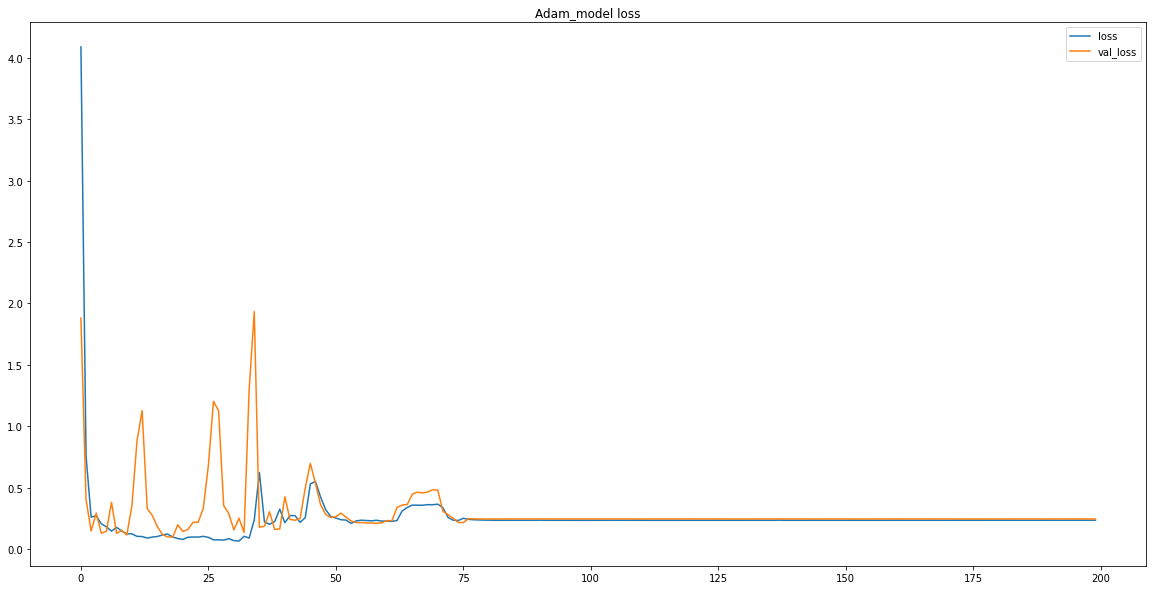

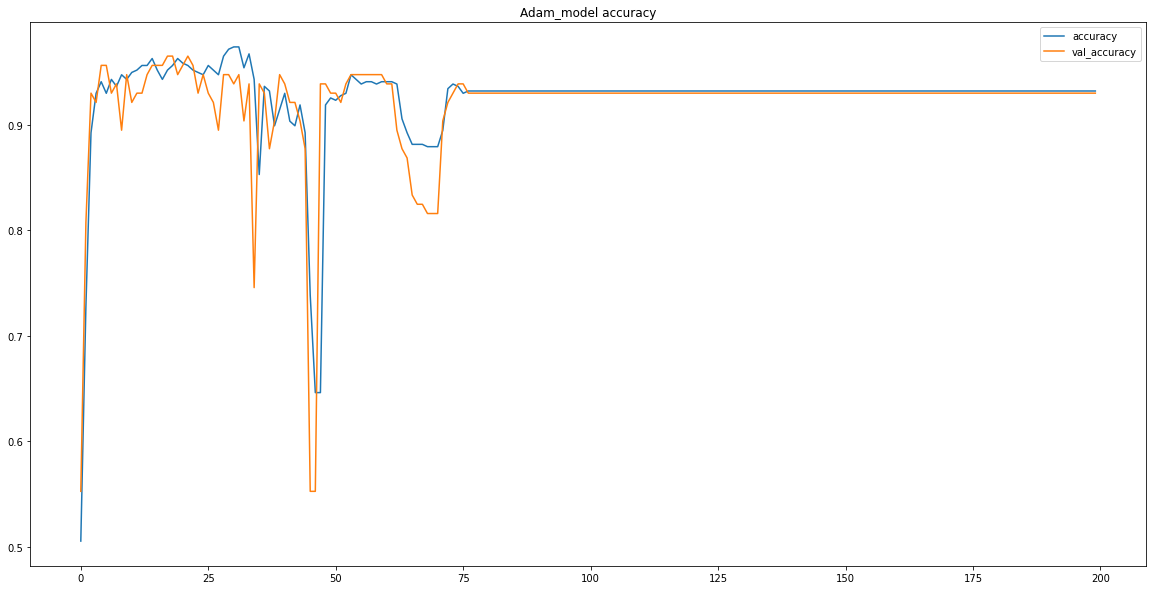

Adam_model loss:  0.243657
Adam_model accuracy:  0.929825
--- 15.286483526229858 seconds ---


In [15]:
# time model runtime
start_time = time.time() 
# build Adam model
adam_model, adam_model_history = build_model(optimizer=Adam,learning_rate=.1, batch_size=100, epochs=200)
#model results and visuals
adam_results = model_results(adam_model, adam_model_history, model_name='adam_model')
# print model runtime
print("--- %s seconds ---" % (time.time() - start_time))


The Adam model with a learning rate of .1 has the worst accuracy scores of the 4 models. It has the 2nd slowest runtime of the 4 models. Both Adam models took the longest to run. 